In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import folium
from catboost import CatBoostRegressor,Pool,cv
%matplotlib inline

## Machine Learning for PDP Forecasting

#### Predicting percent change for each month after peak rate

In [2]:
pd.pandas.set_option("display.max_columns",None)
pd.set_option('use_inf_as_na', True)

In [6]:
# Read in dataset
data = pd.read_excel("../2020.06.19 Multiple Basin % Change From Peak Dataset (Gas, Verdad Actuals).xlsx")
data.columns = data.columns.astype(str)

# Print data dimenstions (number of rows, number of columns)
print(data.shape)

# View the first few rows of the dataset
data.head(5)

(20185, 81)


,API,Operator,LatLen,Proppant,Basin,Reservoir,Latitude,Longitude,Peak Rate,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72
0,500109742,CONOCOPHILLIPS,7851.0,10155040,DENVER-JULESBURG,NaN,39.780533,-104.584467,18946,-0.001531,-0.275942,-0.430856,-0.515676,-0.541961,-0.508392,-0.892642,-0.721313,-0.699937,-0.687058,-0.720733,-0.643777,-0.699937,-0.760952,-0.996833,-0.742743,-0.717830,-0.785548,-0.710968,-0.752877,-0.778581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,500109760,CONOCOPHILLIPS,4042.0,3805079,DENVER-JULESBURG,NaN,39.743419,-104.490114,1373,-0.134013,-0.455208,-0.642389,-0.275310,-0.313911,-0.404224,-0.327749,-0.378004,-0.427531,-0.443554,-0.390386,-0.416606,-0.436271,-0.434086,-0.446468,-0.528041,-0.525127,-0.562272,-0.536052,-0.552804,-0.533867,-0.540422,-0.538237,-0.545521,-0.565186,-0.567371,-0.602331,-0.606701,-0.606701,-0.646759,-0.614712,-0.623452,-0.623452,-0.613256,-0.605972,-0.616897,-0.638747,-0.635834,-0.655499,-0.724690,-0.649672,-0.699927,-0.663511,-0.690459,-0.651857,-0.674436,-0.669337,-0.675892,-0.691916,-0.694101,-0.708667,-0.714494,-0.741442,-0.73343,-0.718135,-0.699199,-0.723234,-0.788055,-0.689002,-0.728332,-0.806992,-0.774217,-0.87764,-0.836125,-0.80772,-0.793882,NaN,NaN,NaN,NaN,NaN,NaN
2,500109772,GREAT WESTERN OIL & GAS,4318.0,3302307,DENVER-JULESBURG,NaN,39.970960,-104.923882,32634,-0.224122,-0.412147,-0.546547,-0.837930,-0.942330,-0.933352,-0.961359,-0.851045,-0.765122,-0.824815,-0.815101,-0.883005,-0.824692,-0.854753,-0.865539,-0.874058,-0.855457,-0.844426,-0.841638,-0.838573,-0.835172,-0.856591,-0.870258,-0.881565,-0.969296,-0.999969,-0.834835,-0.923117,-0.957131,-0.998652,-0.998590,-0.996813,-0.995679,-0.994975,-0.995465,-0.980389,-0.797910,-0.994423,-0.957774,-0.965282,-0.925967,-0.914568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,500109775,GREAT WESTERN OIL & GAS,4145.0,4083160,DENVER-JULESBURG,NaN,39.970961,-104.924096,24050,-0.085904,-0.311393,-0.077256,-0.289896,-0.323285,-0.432848,-0.378420,-0.509272,-0.503950,-0.550062,-0.649314,-0.577089,-0.671435,-0.659044,-0.724407,-0.738836,-0.788025,-0.791351,-0.725863,-0.800956,-0.895634,-0.800665,-0.867360,-0.898378,-0.928981,-0.998046,-0.997339,-0.996881,-0.997173,-0.998836,-0.972765,-0.969023,-0.970270,-0.967568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,500109779,CONOCOPHILLIPS,3816.0,7698920,DENVER-JULESBURG,NaN,39.767172,-104.639147,25932,-0.466991,-0.968533,-0.332639,-0.431050,-0.327009,-0.294655,-0.431629,-0.453764,-0.548319,-0.843745,-0.743252,-0.762417,-0.758985,-0.827202,-0.804489,-0.787945,-0.783665,-0.777495,-0.788292,-0.790606,-0.784436,-0.803178,-0.807805,-0.822921,-0.825968,-0.832292,-0.848951,-0.840660,-0.852730,-0.854928,-0.863258,-0.856779,-0.861330,-0.861098,-0.858785,-0.851959,-0.860366,-0.859787,-0.886742,-0.913620,-0.870855,-0.868772,-0.897000,-0.928582,-0.995334,-0.997416,-0.958314,-0.943120,-0.934675,-0.925883,-0.933094,-0.899005,-0.905368,-0.92276,-0.901897,-0.923068,-0.909031,-0.934637,-0.951489,-0.954535,-0.919405,-0.924418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


#### Step 1: Pick input months, prediction months and other features to include in the model

In [7]:
# One-hot encode basin feature
data[data['Basin'].unique()] = pd.get_dummies(data['Basin'])

# Rename the peak rate feature to be the 0th month
data.rename(columns={'Peak Rate':'0'},inplace=True)
data.head()

,API,Operator,LatLen,Proppant,Basin,Reservoir,Latitude,Longitude,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48,49,50,51,52,53,54,55,56,57,58,59,60,61,62,63,64,65,66,67,68,69,70,71,72,DENVER-JULESBURG,POWDER RIVER,ANADARKO
0,500109742,CONOCOPHILLIPS,7851.0,10155040,DENVER-JULESBURG,NaN,39.780533,-104.584467,18946,-0.001531,-0.275942,-0.430856,-0.515676,-0.541961,-0.508392,-0.892642,-0.721313,-0.699937,-0.687058,-0.720733,-0.643777,-0.699937,-0.760952,-0.996833,-0.742743,-0.717830,-0.785548,-0.710968,-0.752877,-0.778581,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
1,500109760,CONOCOPHILLIPS,4042.0,3805079,DENVER-JULESBURG,NaN,39.743419,-104.490114,1373,-0.134013,-0.455208,-0.642389,-0.275310,-0.313911,-0.404224,-0.327749,-0.378004,-0.427531,-0.443554,-0.390386,-0.416606,-0.436271,-0.434086,-0.446468,-0.528041,-0.525127,-0.562272,-0.536052,-0.552804,-0.533867,-0.540422,-0.538237,-0.545521,-0.565186,-0.567371,-0.602331,-0.606701,-0.606701,-0.646759,-0.614712,-0.623452,-0.623452,-0.613256,-0.605972,-0.616897,-0.638747,-0.635834,-0.655499,-0.724690,-0.649672,-0.699927,-0.663511,-0.690459,-0.651857,-0.674436,-0.669337,-0.675892,-0.691916,-0.694101,-0.708667,-0.714494,-0.741442,-0.73343,-0.718135,-0.699199,-0.723234,-0.788055,-0.689002,-0.728332,-0.806992,-0.774217,-0.87764,-0.836125,-0.80772,-0.793882,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
2,500109772,GREAT WESTERN OIL & GAS,4318.0,3302307,DENVER-JULESBURG,NaN,39.970960,-104.923882,32634,-0.224122,-0.412147,-0.546547,-0.837930,-0.942330,-0.933352,-0.961359,-0.851045,-0.765122,-0.824815,-0.815101,-0.883005,-0.824692,-0.854753,-0.865539,-0.874058,-0.855457,-0.844426,-0.841638,-0.838573,-0.835172,-0.856591,-0.870258,-0.881565,-0.969296,-0.999969,-0.834835,-0.923117,-0.957131,-0.998652,-0.998590,-0.996813,-0.995679,-0.994975,-0.995465,-0.980389,-0.797910,-0.994423,-0.957774,-0.965282,-0.925967,-0.914568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
3,500109775,GREAT WESTERN OIL & GAS,4145.0,4083160,DENVER-JULESBURG,NaN,39.970961,-104.924096,24050,-0.085904,-0.311393,-0.077256,-0.289896,-0.323285,-0.432848,-0.378420,-0.509272,-0.503950,-0.550062,-0.649314,-0.577089,-0.671435,-0.659044,-0.724407,-0.738836,-0.788025,-0.791351,-0.725863,-0.800956,-0.895634,-0.800665,-0.867360,-0.898378,-0.928981,-0.998046,-0.997339,-0.996881,-0.997173,-0.998836,-0.972765,-0.969023,-0.970270,-0.967568,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0
4,500109779,CONOCOPHILLIPS,3816.0,7698920,DENVER-JULESBURG,NaN,39.767172,-104.639147,25932,-0.466991,-0.968533,-0.332639,-0.431050,-0.327009,-0.294655,-0.431629,-0.453764,-0.548319,-0.843745,-0.743252,-0.762417,-0.758985,-0.827202,-0.804489,-0.787945,-0.783665,-0.777495,-0.788292,-0.790606,-0.784436,-0.803178,-0.807805,-0.822921,-0.825968,-0.832292,-0.848951,-0.840660,-0.852730,-0.854928,-0.863258,-0.856779,-0.861330,-0.861098,-0.858785,-0.851959,-0.860366,-0.859787,-0.886742,-0.913620,-0.870855,-0.868772,-0.897000,-0.928582,-0.995334,-0.997416,-0.958314,-0.943120,-0.934675,-0.925883,-0.933094,-0.899005,-0.905368,-0.92276,-0.901897,-0.923068,-0.909031,-0.934637,-0.951489,-0.954535,-0.919405,-0.924418,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,0,1,0


In [21]:
# Inputs and targets
# We will use the first 12 months after peak rate to forecast out to 48 months
inputs = [str(i) for i in np.arange(0,13)]
targets = [str(j) for j in np.arange(13,49)]

# Other non-monthly inputs to add to the model
other_inputs = ['API','LatLen','Proppant']+list(data['Basin'].unique())
all_features = other_inputs + inputs + targets

# Slicing data on features we need
data_train = data[all_features]

# Dropping wells that don't have at least the number of months we want to predict to
data_train = data_train.dropna()
print(data_train.shape)
data_train.head()

(9829, 55)


,API,LatLen,Proppant,DENVER-JULESBURG,POWDER RIVER,ANADARKO,0,1,2,3,4,5,6,7,8,9,10,11,12,13,14,15,16,17,18,19,20,21,22,23,24,25,26,27,28,29,30,31,32,33,34,35,36,37,38,39,40,41,42,43,44,45,46,47,48
1,500109760,4042.0,3805079,0,1,0,1373,-0.134013,-0.455208,-0.642389,-0.275310,-0.313911,-0.404224,-0.327749,-0.378004,-0.427531,-0.443554,-0.390386,-0.416606,-0.436271,-0.434086,-0.446468,-0.528041,-0.525127,-0.562272,-0.536052,-0.552804,-0.533867,-0.540422,-0.538237,-0.545521,-0.565186,-0.567371,-0.602331,-0.606701,-0.606701,-0.646759,-0.614712,-0.623452,-0.623452,-0.613256,-0.605972,-0.616897,-0.638747,-0.635834,-0.655499,-0.724690,-0.649672,-0.699927,-0.663511,-0.690459,-0.651857,-0.674436,-0.669337,-0.675892
4,500109779,3816.0,7698920,0,1,0,25932,-0.466991,-0.968533,-0.332639,-0.431050,-0.327009,-0.294655,-0.431629,-0.453764,-0.548319,-0.843745,-0.743252,-0.762417,-0.758985,-0.827202,-0.804489,-0.787945,-0.783665,-0.777495,-0.788292,-0.790606,-0.784436,-0.803178,-0.807805,-0.822921,-0.825968,-0.832292,-0.848951,-0.840660,-0.852730,-0.854928,-0.863258,-0.856779,-0.861330,-0.861098,-0.858785,-0.851959,-0.860366,-0.859787,-0.886742,-0.913620,-0.870855,-0.868772,-0.897000,-0.928582,-0.995334,-0.997416,-0.958314,-0.943120
6,500109805,8050.0,11745260,0,1,0,33135,-0.182405,-0.999940,-0.796650,-0.568311,-0.481877,-0.601539,-0.693285,-0.370937,-0.137921,-0.195533,-0.307741,-0.348725,-0.437362,-0.551411,-0.547216,-0.648619,-0.735899,-0.828882,-0.917308,-0.847774,-0.852814,-0.851094,-0.870681,-0.869805,-0.876234,-0.872431,-0.853871,-0.853267,-0.861566,-0.883175,-0.860329,-0.864977,-0.887551,-0.859725,-0.874453,-0.883024,-0.896273,-0.887189,-0.888547,-0.941844,-0.986298,-0.991852,-0.931915,-0.947246,-0.922348,-0.945073,-0.999547,-0.964207
110,500507167,3960.0,2920140,0,1,0,8930,-0.829563,-0.875812,-0.595409,-0.554311,-0.780739,-0.526988,-0.442441,-0.873908,-0.858903,-0.693505,-0.763158,-0.752968,-0.868869,-0.915566,-0.830907,-0.816685,-0.777156,-0.854983,-0.859798,-0.883987,-0.912654,-0.919597,-0.939754,-0.925084,-0.927996,-0.912542,-0.895633,-0.942105,-0.796976,-0.845577,-0.839418,-0.855095,-0.861702,-0.873796,-0.902688,-0.925196,-0.988802,-0.993617,-0.996417,-0.999776,-0.865174,-0.839866,-0.989474,-0.908847,-0.930123,-0.936170,-0.937514,-0.943561
111,500507173,3995.0,7554783,0,1,0,36780,-0.575231,-0.566911,-0.932110,-0.558999,-0.374198,-0.520174,-0.568162,-0.655764,-0.737738,-0.821533,-0.827243,-0.847036,-0.799184,-0.809706,-0.807912,-0.831049,-0.834910,-0.835536,-0.824225,-0.832137,-0.841599,-0.840729,-0.817346,-0.826754,-0.862507,-0.847145,-0.852746,-0.848831,-0.866014,-0.887955,-0.859271,-0.896030,-0.870636,-0.880587,-0.958374,-0.944209,-0.924687,-0.922675,-0.938390,-0.936949,-0.917945,-0.979690,-0.900625,-0.935264,-0.892197,-0.921968,-0.924307,-0.925639


#### Step 2: Build a model and evaluate on train/test split

In [22]:
# Splitting 
from sklearn.model_selection import train_test_split

# Getting input and target matricies
X,y = data_train[other_inputs + inputs],data_train[targets]
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size=.10,random_state=np.random.randint(low=0,high=200))

print(X_train.shape)
print(y_train.shape)
print(X_test.shape)
print(y_test.shape)

# Reseting index order
X_train.index = range(X_train.shape[0])
X_test.index = range(X_test.shape[0])
y_train.index = range(y_train.shape[0])
y_test.index = range(y_test.shape[0])

(8846, 19)
(8846, 36)
(983, 19)
(983, 36)


In [23]:
# Fit model
from sklearn.ensemble import RandomForestRegressor
model = RandomForestRegressor(n_estimators=300)
model.fit(X_train.drop("API",axis=1),y_train)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

In [24]:
# Making predictions on test set
preds = model.predict(X_test.drop("API",axis=1))
preds = pd.DataFrame(preds,columns=y.columns)

# Joining X_test and preds into one dataframe
joined_pred = X_test.join(preds,on=X_test.index)

for t in targets:
    joined_pred['Predicted ' + t] = joined_pred[t]
    joined_pred = joined_pred.drop(t,axis=1)

# Joining X_test and y_test into one dataframe
joined_true = X_test.join(y_test,on=X_test.index)

print(joined_pred.shape)
print(joined_true.shape)
joined_pred.head()

(983, 55)
(983, 55)


,API,LatLen,Proppant,DENVER-JULESBURG,POWDER RIVER,ANADARKO,0,1,2,3,4,5,6,7,8,9,10,11,12,Predicted 13,Predicted 14,Predicted 15,Predicted 16,Predicted 17,Predicted 18,Predicted 19,Predicted 20,Predicted 21,Predicted 22,Predicted 23,Predicted 24,Predicted 25,Predicted 26,Predicted 27,Predicted 28,Predicted 29,Predicted 30,Predicted 31,Predicted 32,Predicted 33,Predicted 34,Predicted 35,Predicted 36,Predicted 37,Predicted 38,Predicted 39,Predicted 40,Predicted 41,Predicted 42,Predicted 43,Predicted 44,Predicted 45,Predicted 46,Predicted 47,Predicted 48
0,3508324315,4515.0,3272370,1,0,0,34725,-0.072167,-0.243427,-0.149201,-0.284694,-0.352109,-0.313837,-0.337912,-0.258258,-0.321353,-0.318359,-0.360115,-0.320605,-0.381842,-0.408306,-0.401750,-0.424114,-0.440214,-0.447177,-0.455844,-0.474851,-0.490740,-0.499834,-0.513880,-0.509046,-0.529026,-0.537828,-0.543756,-0.564719,-0.566864,-0.559350,-0.570102,-0.570757,-0.594504,-0.590912,-0.604583,-0.601145,-0.622562,-0.625148,-0.642315,-0.655057,-0.658514,-0.669757,-0.678848,-0.691076,-0.702805,-0.680022,-0.690915,-0.685092
1,4239332551,5200.0,4254433,1,0,0,17267,-0.451092,-0.412058,-0.630799,-0.395552,-0.265593,-0.151445,-0.170267,-0.235941,-0.261539,-0.416517,-0.345804,-0.294550,-0.383242,-0.387426,-0.406312,-0.425725,-0.449821,-0.473924,-0.482028,-0.489318,-0.486243,-0.511920,-0.500129,-0.502309,-0.519519,-0.522272,-0.538250,-0.552240,-0.559790,-0.549778,-0.559736,-0.557833,-0.589645,-0.595539,-0.613734,-0.627927,-0.641754,-0.648111,-0.655550,-0.650458,-0.684086,-0.675588,-0.695932,-0.684499,-0.690715,-0.700281,-0.702359,-0.723316
2,3500921910,4000.0,2404480,1,0,0,82117,-0.477234,-0.590462,-0.578370,-0.624950,-0.743926,-0.708136,-0.749272,-0.760610,-0.771302,-0.804815,-0.811452,-0.807019,-0.825847,-0.838393,-0.842833,-0.850848,-0.851215,-0.860572,-0.838496,-0.868473,-0.872850,-0.864502,-0.868615,-0.877563,-0.882108,-0.894226,-0.893712,-0.890926,-0.898046,-0.894830,-0.906930,-0.911252,-0.911928,-0.918556,-0.919991,-0.919031,-0.922046,-0.920960,-0.922500,-0.924643,-0.905718,-0.924577,-0.926895,-0.928525,-0.929448,-0.930973,-0.934013,-0.934690
3,512338043,7136.0,5456650,0,1,0,16276,-0.145367,-0.606353,-0.771688,-0.795527,-0.819796,-0.804129,-0.772426,-0.800627,-0.498157,-0.628963,-0.857889,-0.837614,-0.829903,-0.814166,-0.809385,-0.817336,-0.825638,-0.821885,-0.818235,-0.816677,-0.822068,-0.825644,-0.831226,-0.831736,-0.822339,-0.816217,-0.831733,-0.832918,-0.844705,-0.839599,-0.844489,-0.854478,-0.850104,-0.852659,-0.860862,-0.868302,-0.868563,-0.867925,-0.858362,-0.867998,-0.871091,-0.876330,-0.871372,-0.866258,-0.876346,-0.875257,-0.875820,-0.877949
4,3501724643,4545.0,5940484,1,0,0,196936,-0.094142,-0.224210,-0.334119,-0.393590,-0.460378,-0.536657,-0.530802,-0.606816,-0.615855,-0.661448,-0.679185,-0.690300,-0.720255,-0.726774,-0.741557,-0.746550,-0.761296,-0.764633,-0.777346,-0.784031,-0.785197,-0.796157,-0.799462,-0.800457,-0.814406,-0.815161,-0.828541,-0.822394,-0.829098,-0.834626,-0.839521,-0.845570,-0.846357,-0.843034,-0.852192,-0.854300,-0.861924,-0.864601,-0.867515,-0.871255,-0.869665,-0.869505,-0.869302,-0.876899,-0.873644,-0.877638,-0.878010,-0.877008


In [25]:
# Pointwise regression metrics
# Mean Absolute Percentage Error
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Median Absolute Percentage Error
def mdape(y_true, y_pred): 
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

for t in targets:
    print(f"Metrics for predicting {t} using {0.2*100}% of data as validation")
    print("R2: {}".format(np.corrcoef(y_test[t],preds[t])[0][1]))
    print("MAPE: {}".format(mape(y_test[t].values,preds[t].values)))
    print("MdAPE: {}".format(mdape(y_test[t].values,preds[t].values)))
    print('')

Metrics for predicting 13 using 20.0% of data as validation
R2: 0.8780283129687703
MAPE: 9.926308085868655
MdAPE: 4.086456195901968

Metrics for predicting 14 using 20.0% of data as validation
R2: 0.8244152926029041
MAPE: 11.175137144511496
MdAPE: 4.710363834595157

Metrics for predicting 15 using 20.0% of data as validation
R2: 0.8092554958108877
MAPE: 12.951532252088043
MdAPE: 5.71294428253428

Metrics for predicting 16 using 20.0% of data as validation
R2: 0.7796526915682686
MAPE: 29.165299658837796
MdAPE: 5.634974274537406

Metrics for predicting 17 using 20.0% of data as validation
R2: 0.7558619042196718
MAPE: 13.151076798177646
MdAPE: 5.588656071996299

Metrics for predicting 18 using 20.0% of data as validation
R2: 0.7332215177627593
MAPE: 13.020017455680152
MdAPE: 5.816855020319629

Metrics for predicting 19 using 20.0% of data as validation
R2: 0.7255043803225701
MAPE: 14.764904091418268
MdAPE: 6.161454906777951

Metrics for predicting 20 using 20.0% of data as validation
R2: 

In [26]:
# Seeing which predictions still have bad next time-steps
data_plot_pred = joined_pred.drop(other_inputs+['0'],axis=1)
data_plot_true = joined_true.drop(other_inputs+['0'],axis=1)

In [27]:
# Mean Absolute Percentage Error
def mape(y_true, y_pred): 
    return np.mean(np.abs((y_true - y_pred) / y_true)) * 100

# Median Absolute Percentage Error
def mdape(y_true, y_pred): 
    return np.median(np.abs((y_true - y_pred) / y_true)) * 100

# std Absolute Percentage Error
def stdape(y_true, y_pred): 
    return np.std(np.abs((y_true - y_pred) / y_true)) * 100
    

In [28]:
mape_curves = []
predicted_targets = ["Predicted " + t for t in targets]
i = 0
for _,row in data_plot_pred.iterrows():
    row_actual = data_plot_true.iloc[i]
    #print(mape(row.values,row_actual.values))
    mape_curves.append(mape(row[predicted_targets].values,row_actual[targets].values))
    i+=1

print("Average percent difference between forecated curves:", np.mean(mape_curves))
print("Median percent difference between forecasted curves:", np.median(mape_curves))
print("Std percent difference between forecasted curves:",np.std(mape_curves))
print("Max percent difference between forecasted curves:",np.max(mape_curves))
print("Min percent difference between forecasted curves:",np.min(mape_curves))

Average percent difference between forecated curves: 9.431231377440037
Median percent difference between forecasted curves: 7.438623726316522
Std percent difference between forecasted curves: 7.947465685745271
Max percent difference between forecasted curves: 75.69144580762264
Min percent difference between forecasted curves: 0.3479418398358969


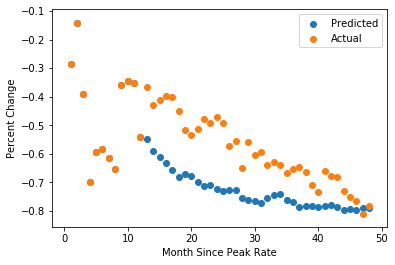

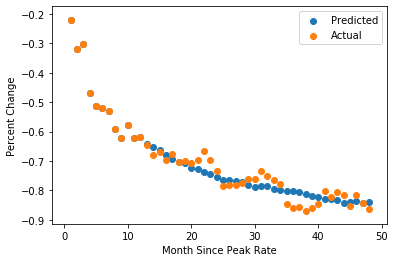

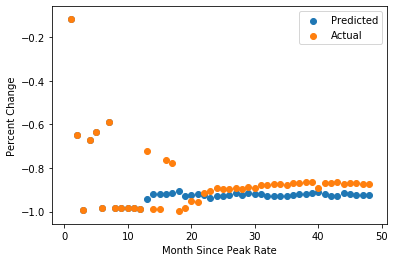

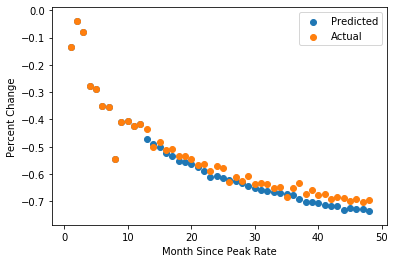

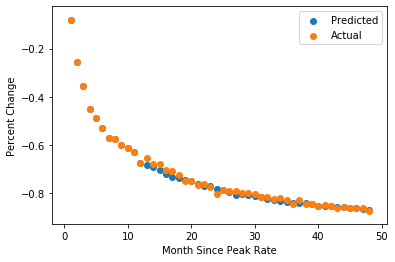

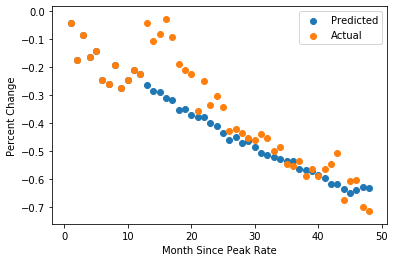

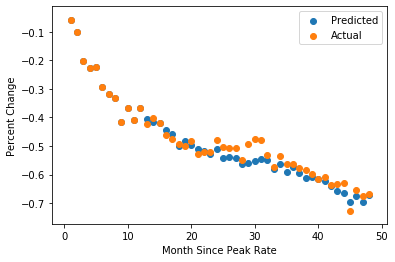

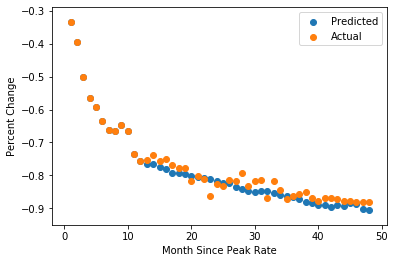

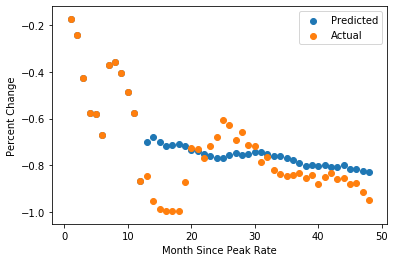

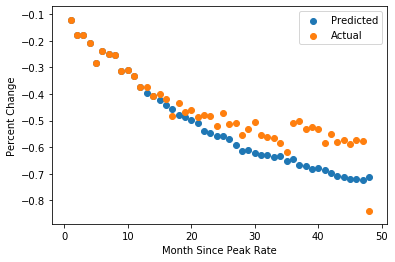

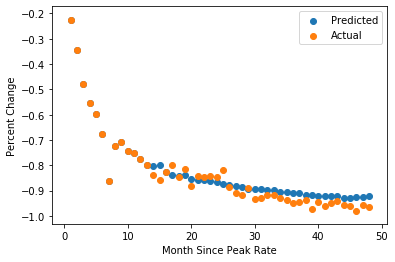

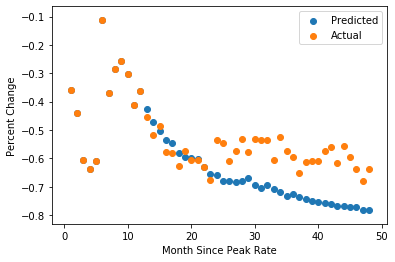

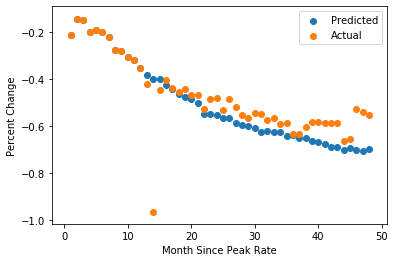

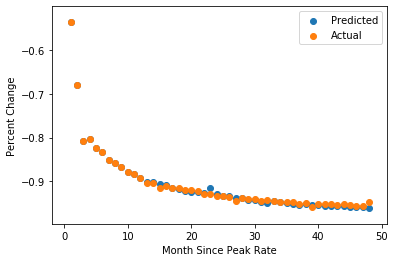

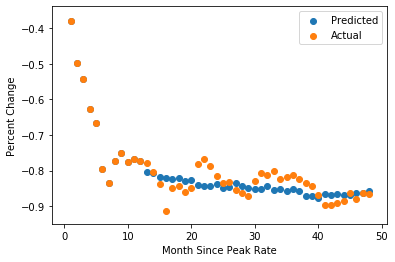

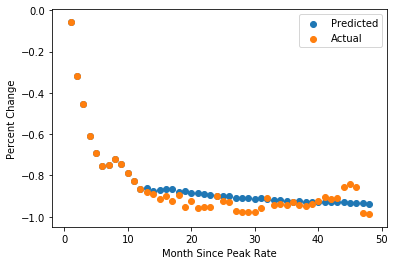

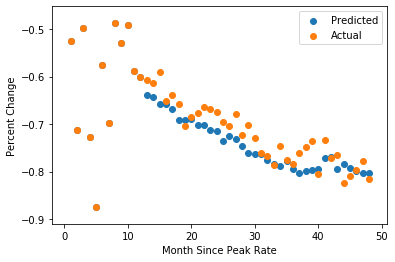

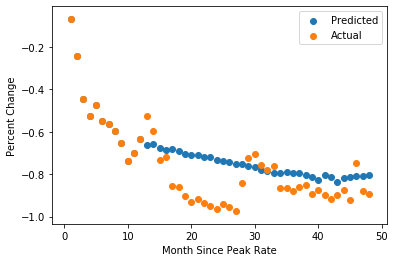

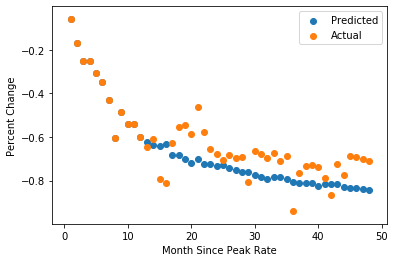

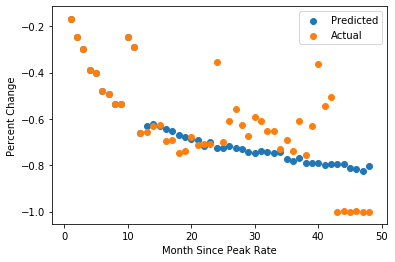

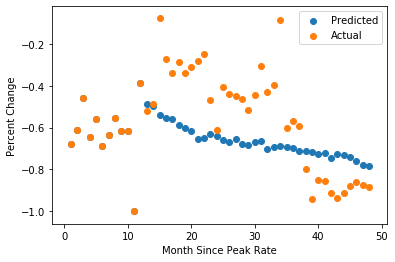

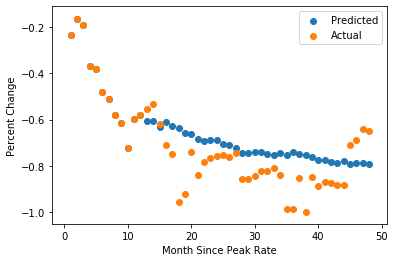

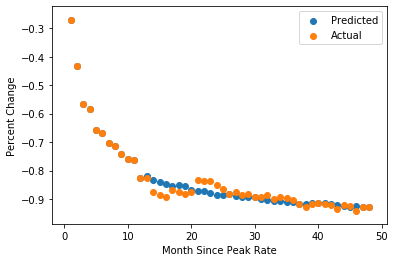

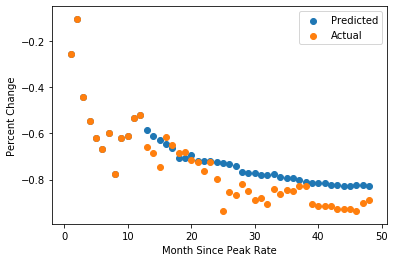

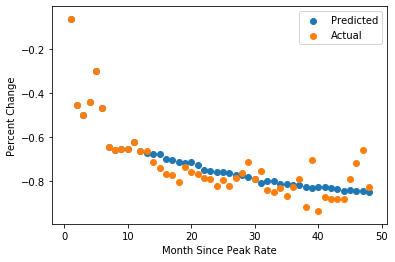

In [34]:
# Plotting actual and predicted cum-time plots
i = 100
for _,row in data_plot_pred.iloc[100:125].iterrows():
    row_actual = data_plot_true.iloc[i]
    plt.scatter(range(1,49),row.values,label="Predicted")
    plt.scatter(range(1,49),row_actual.values,label="Actual")
    plt.xlabel("Month Since Peak Rate")
    plt.ylabel("Percent Change")
    plt.legend()
    plt.show()
    i += 1

#### Step 3: Train model on the entire dataset

In [35]:
model = RandomForestRegressor(n_estimators=300)
model.fit(X,y)

RandomForestRegressor(bootstrap=True, criterion='mse', max_depth=None,
                      max_features='auto', max_leaf_nodes=None,
                      min_impurity_decrease=0.0, min_impurity_split=None,
                      min_samples_leaf=1, min_samples_split=2,
                      min_weight_fraction_leaf=0.0, n_estimators=300,
                      n_jobs=None, oob_score=False, random_state=None,
                      verbose=0, warm_start=False)

#### Step 4: Make predictions on wells that only have production up to the last input month
 - If the inputs to the model are months 1-12 , we make predictions on wells that have only 12 months of production but not 13 months or more.

In [38]:
# Getting prediction data
data_predict = data[data_train.columns]
data_predict = data_predict[(data_predict[targets[0]].isna()) & (data_predict[inputs[-1]].notnull())]

# Maybe?
data_predict = data_predict[X.columns]

# Wells that aren't missing input variables
for i in inputs + other_inputs:
    data_predict = data_predict[data_predict[i].notnull()]

# Drop columns that we want to forecast
data_predict = data_predict.dropna(axis=1)
print(f"Number of wells that have produced for only {inputs[-1]} months: {data_predict.shape[0]}")

# Making predictions on unseen wells
preds = model.predict(data_predict)
preds = pd.DataFrame(preds,columns=y.columns)

# Labeling columns as predicted
preds.columns = ['Predicted ' + i for i in y.columns]
preds.index = range(0,preds.shape[0])
data_predict.index = range(0,preds.shape[0])

# Joining new inputs with predictions to get total data output
total_data = data_predict.join(preds,on=data_predict.index)

Number of wells that have produced for only 12 months: 194


#### Step 5: Evaluate new predictions

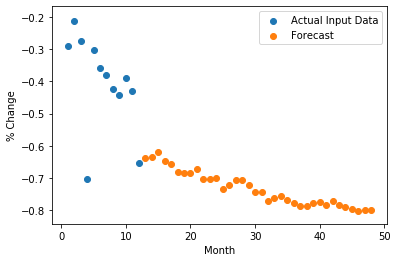

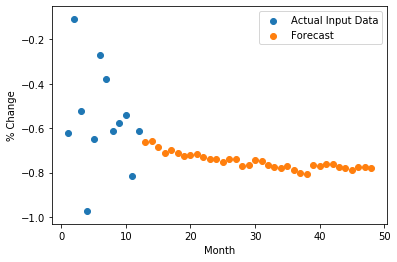

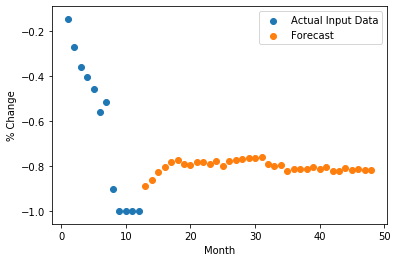

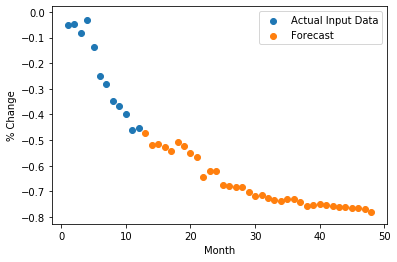

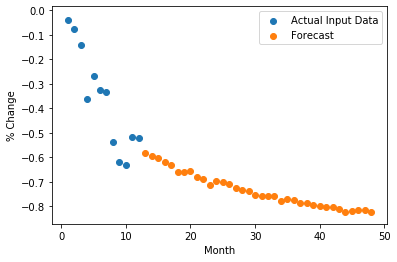

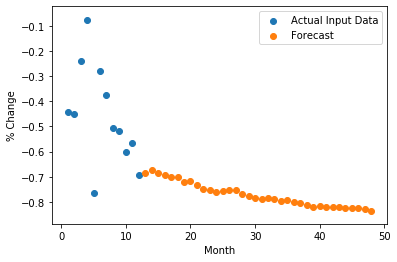

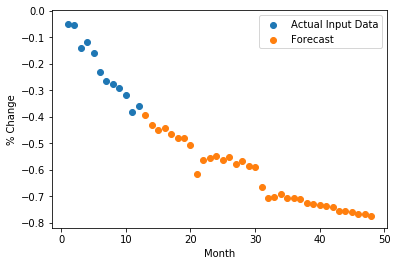

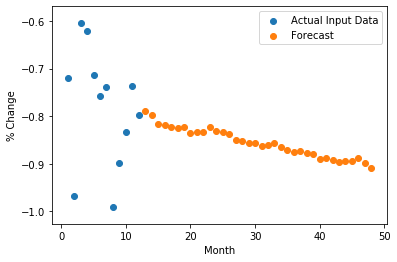

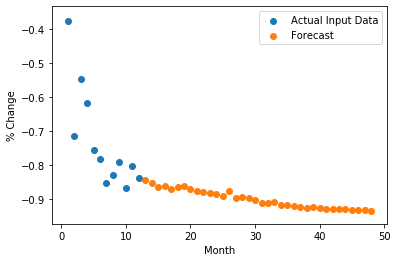

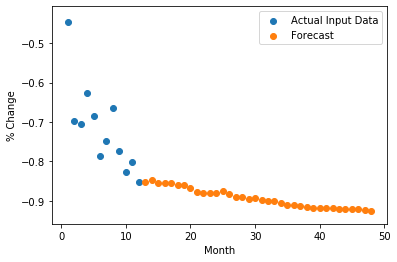

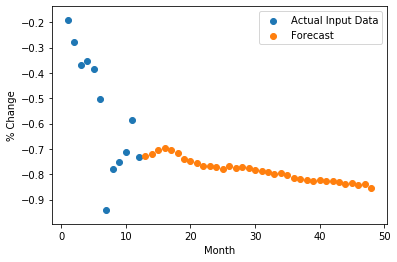

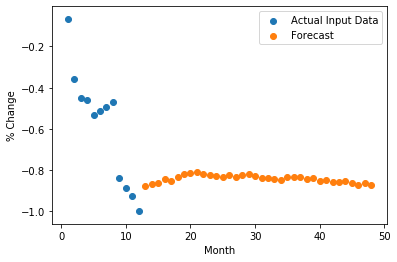

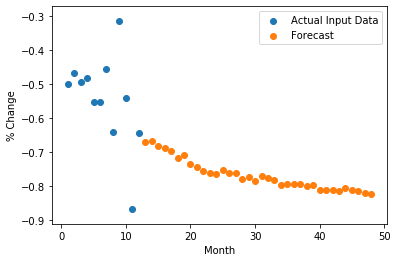

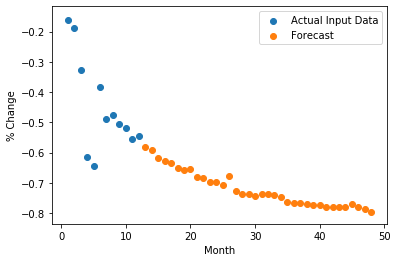

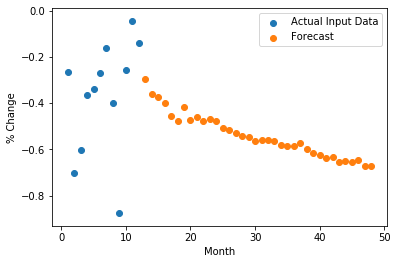

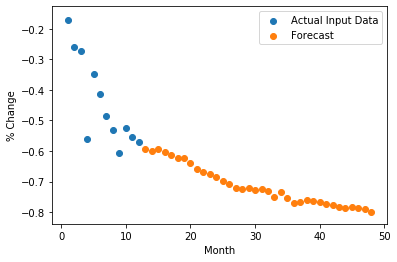

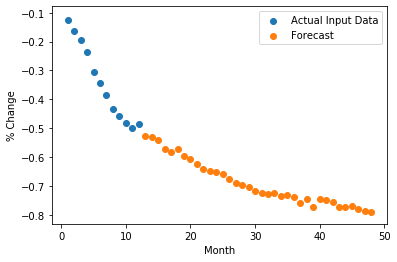

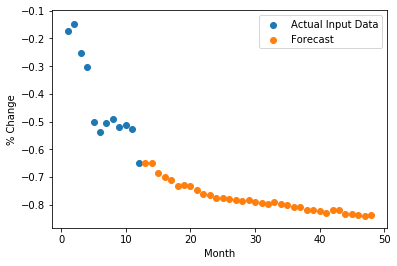

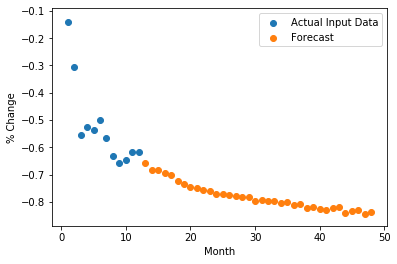

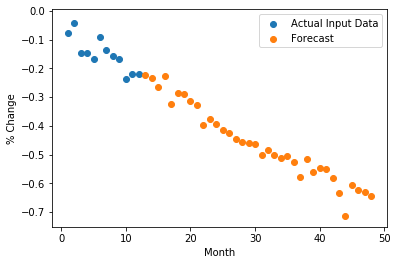

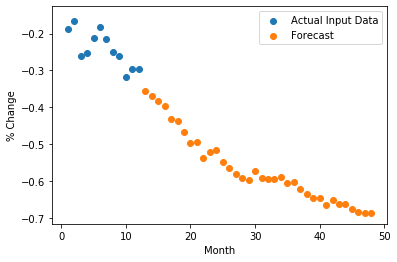

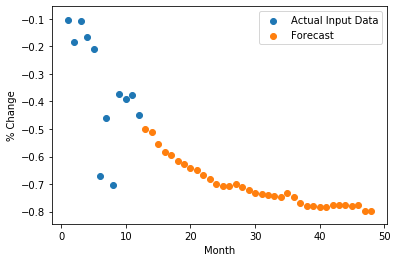

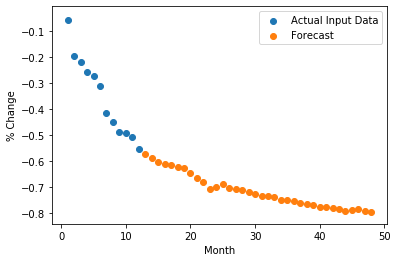

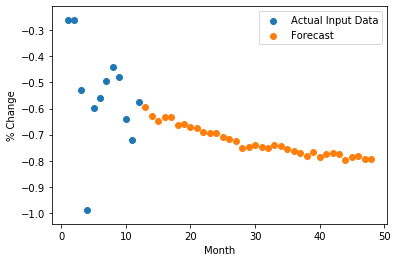

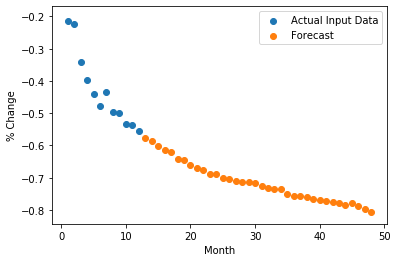

In [48]:
# Calculating metrics on bad predictions
data_plot = total_data.drop(['API','LatLen','Proppant','DENVER-JULESBURG','POWDER RIVER','ANADARKO','0'],axis=1)

# Plotting forecasts
for _,row in data_plot[75:100].iterrows():
        plt.scatter(range(1,13),row.values[0:12],label = "Actual Input Data")
        plt.scatter(range(13,49),row.values[12:],label="Forecast")
        plt.xlabel("Month")
        plt.ylabel("% Change")
        plt.legend()
        plt.show()